In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2230, '18 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['median'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.000000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.011050
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.006650
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.000050
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.004750
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


<IPython.core.display.Javascript object>


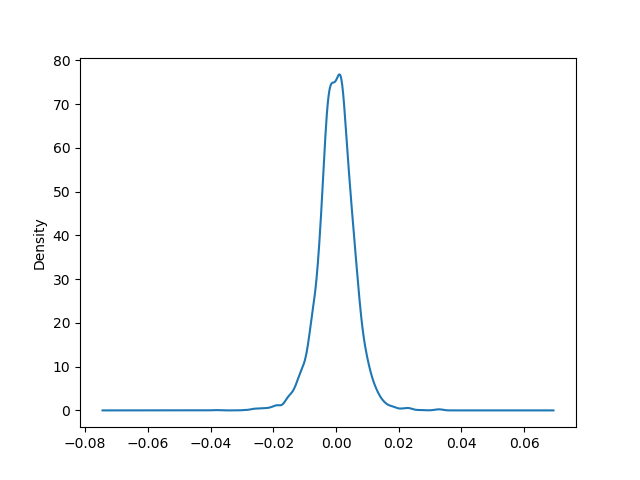

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()